In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [5]:
df = pd.read_csv('carclaims_insurance.csv')

In [73]:
df.shape

(15420, 61)

In [7]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [11]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [13]:
df.describe(include = object)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,8,9,2,2,2,4,5,5,3,2
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5807,5593,14992,15333,15179,7047,14324,14316,5962,14497


In [16]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [18]:
df.duplicated().sum()

0

Data Distribution

Text(0.5, 1.0, 'distribution of fraudulent vs non fraudulent claims')

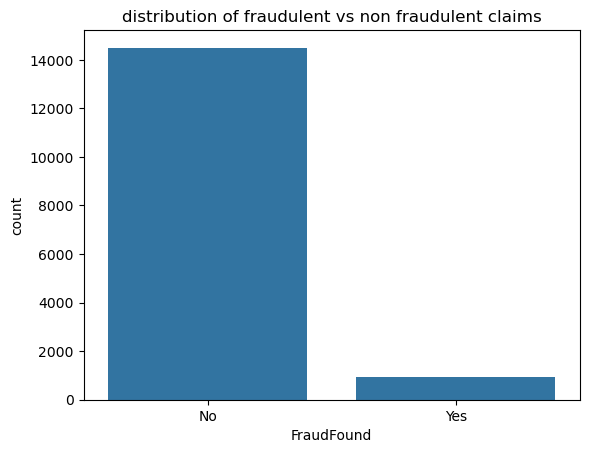

In [21]:
sns.countplot(x = "FraudFound" , data = df) 
plt.title("distribution of fraudulent vs non fraudulent claims")

Text(0.5, 0.98, 'Histograms of numerical fetaures')

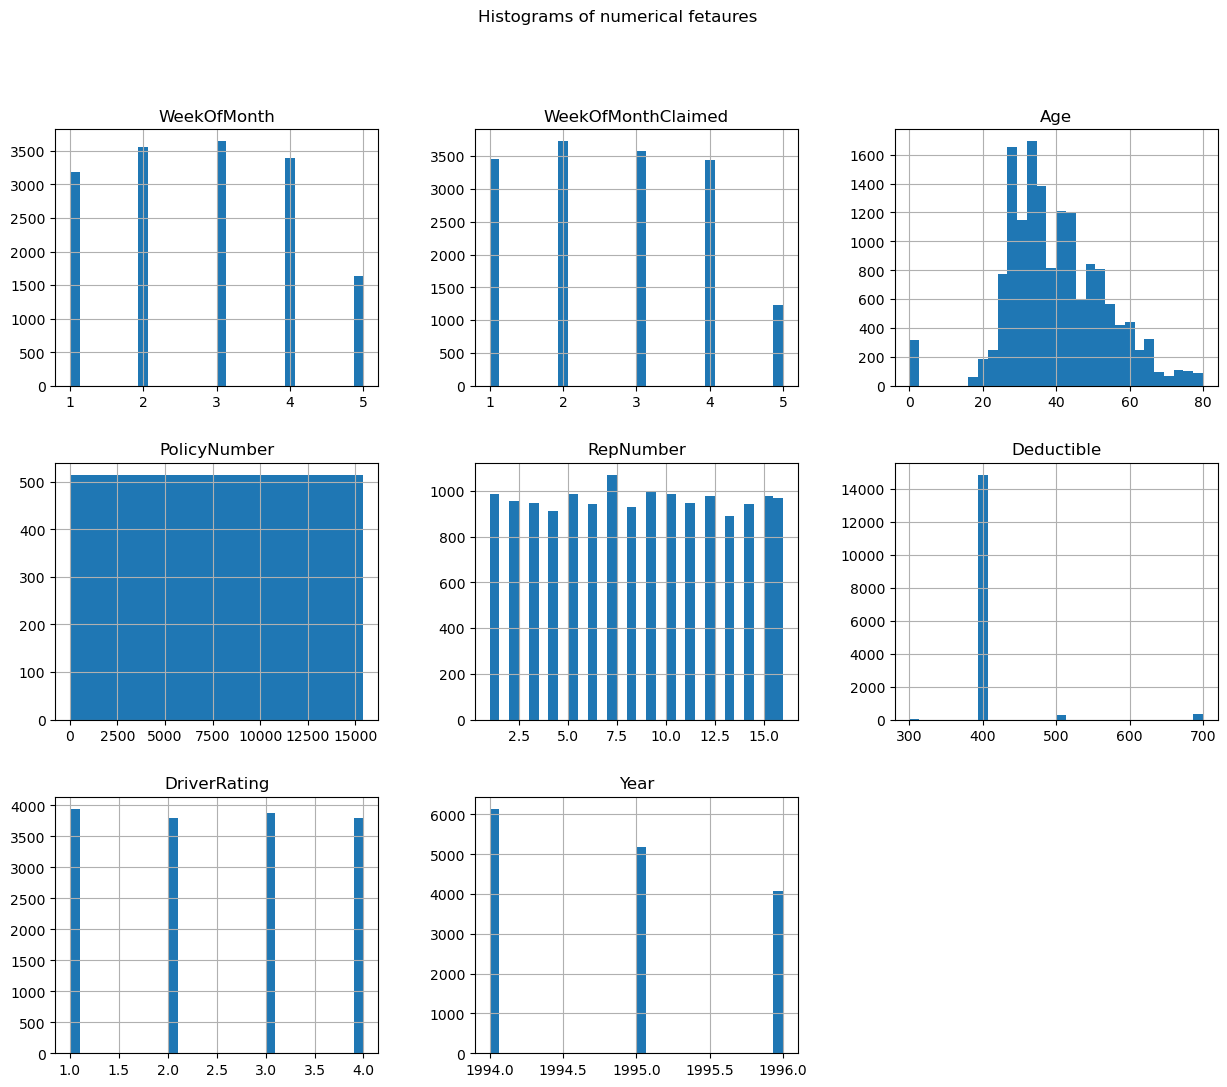

In [23]:
num_cols = df.select_dtypes(include=['int64']).columns

df[num_cols].hist(bins = 30 , figsize = (15 , 12))
plt.suptitle("Histograms of numerical fetaures")

In [23]:
cat_cols = df.select_dtypes(include = ['object']).nunique()
top_catcols = cat_cols[cat_cols <10].index 

In [25]:
catcols2 = df.select_dtypes( include = ['object']).columns
for col in catcols2:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_vals)
    print('-' * 40)

Unique values in 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
----------------------------------------
Unique values in 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
----------------------------------------
Unique values in 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
----------------------------------------
Unique values in 'AccidentArea':
['Urban' 'Rural']
----------------------------------------
Unique values in 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
----------------------------------------
Unique values in 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
----------------------------------------
Unique values in 'Sex':
['Female' 'Male']
---------------------------------------

In [32]:
miss_values = df.select_dtypes(include='object') == '0'
row_indices, col_indices = np.where(miss_values)
object_cols = df.select_dtypes(include='object').columns

for row, col in zip(row_indices, col_indices):
    print(f"Value 0 found at row {row}, column '{object_cols[col]}'")


In [59]:
df['DayOfWeekClaimed_invalid'] = (df['DayOfWeekClaimed'] == 0).astype(int)
df['MonthClaimed_invalid'] = (df['MonthClaimed'] == 0).astype(int)


In [27]:
df.loc[1516, 'DayOfWeekClaimed'] = np.nan
df.loc[1516, 'MonthClaimed'] = np.nan


In [29]:
print(df.loc[1516, 'DayOfWeekClaimed'])


nan


In [31]:
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].fillna(df['DayOfWeekClaimed'].mode()[0])
df['MonthClaimed']=df['MonthClaimed'].fillna(df['MonthClaimed'].mode()[0])


In [37]:
print(df.loc[1516])


Month                                  Jul
WeekOfMonth                              2
DayOfWeek                           Monday
Make                                 Honda
AccidentArea                         Rural
DayOfWeekClaimed                    Monday
MonthClaimed                           Jan
WeekOfMonthClaimed                       1
Sex                                   Male
MaritalStatus                       Single
Age                                     40
Fault                        Policy Holder
PolicyType              Sedan - All Perils
VehicleCategory                      Sedan
VehiclePrice              more than 69,000
PolicyNumber                          1517
RepNumber                               15
Deductible                             400
DriverRating                             2
Days:Policy-Accident          more than 30
Days:Policy-Claim                     none
PastNumberOfClaims                    none
AgeOfVehicle                           new
AgeOfPolicy

In [35]:
df.loc[1516, 'Age'] = np.nan
df['Age'] = df['Age'].fillna(round(df['Age'].mean())).astype(int)


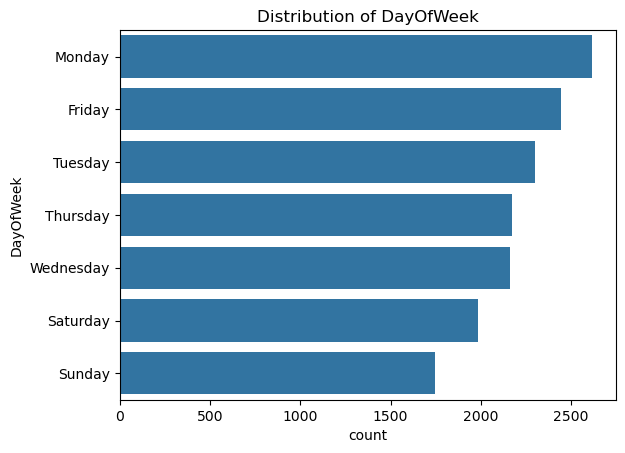

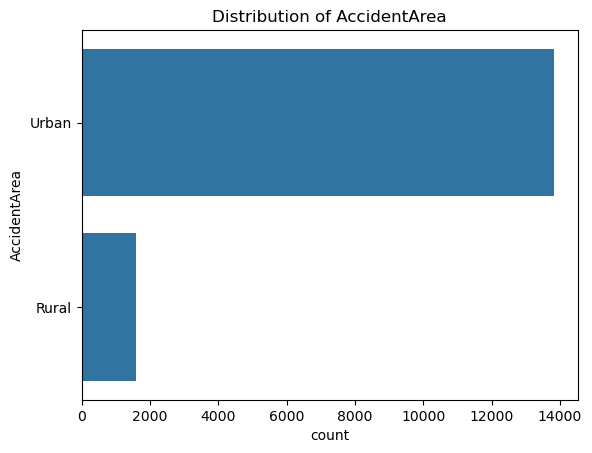

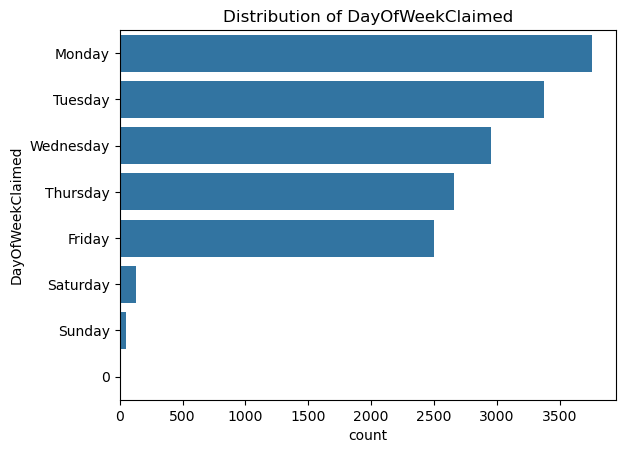

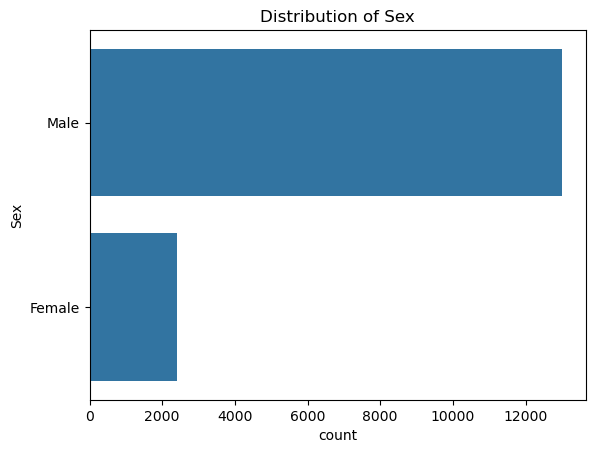

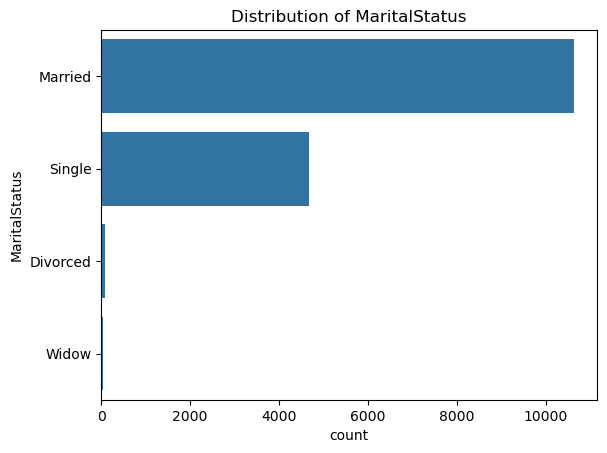

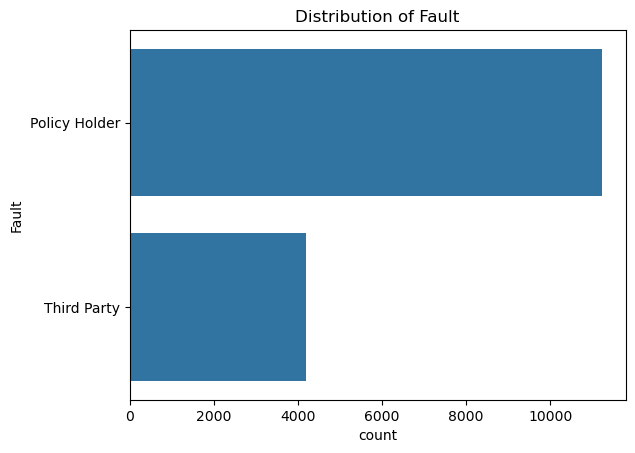

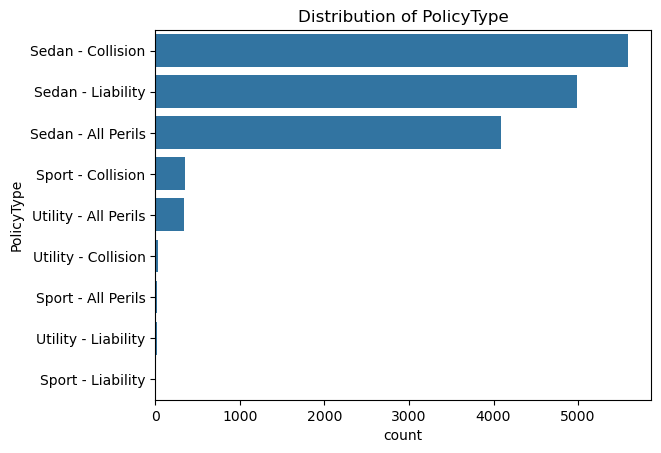

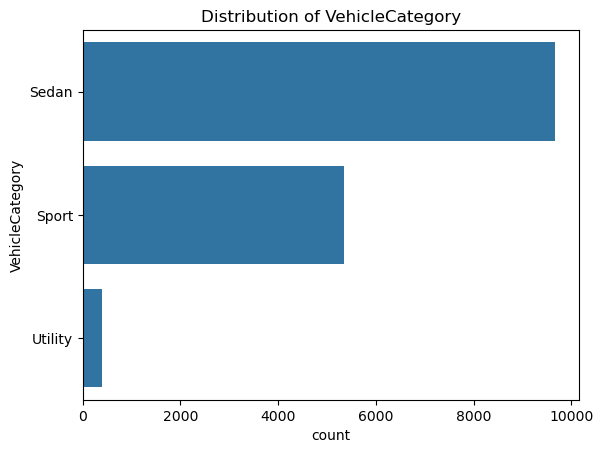

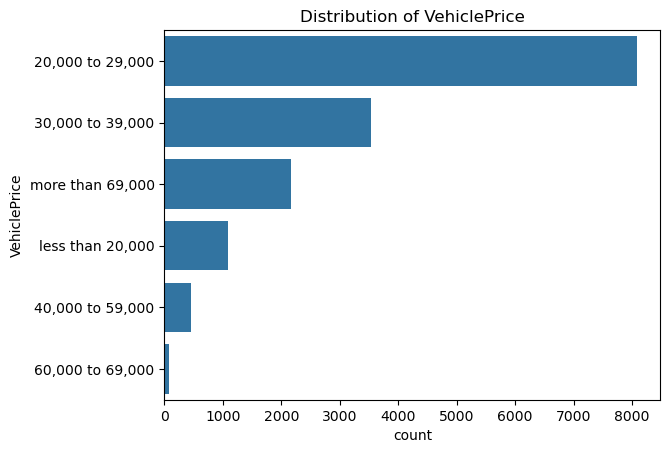

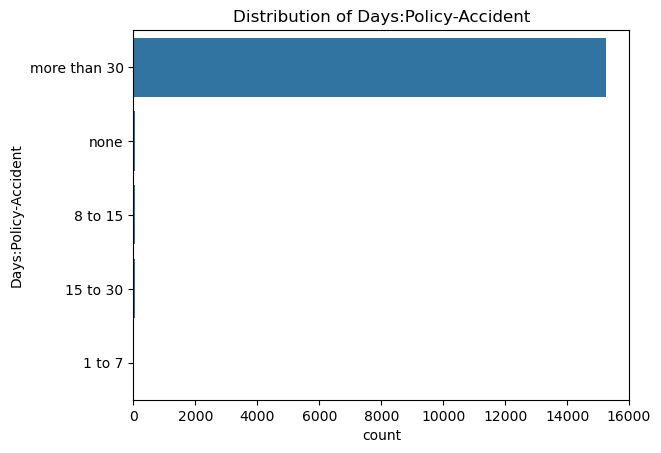

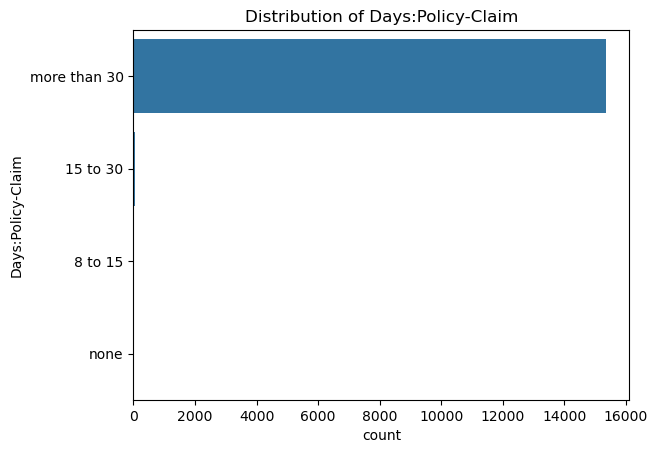

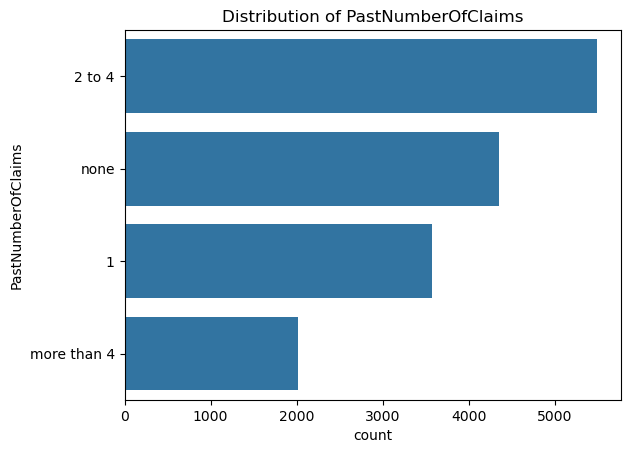

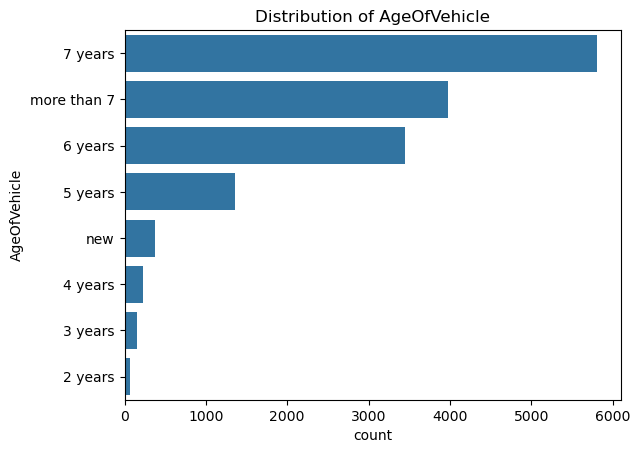

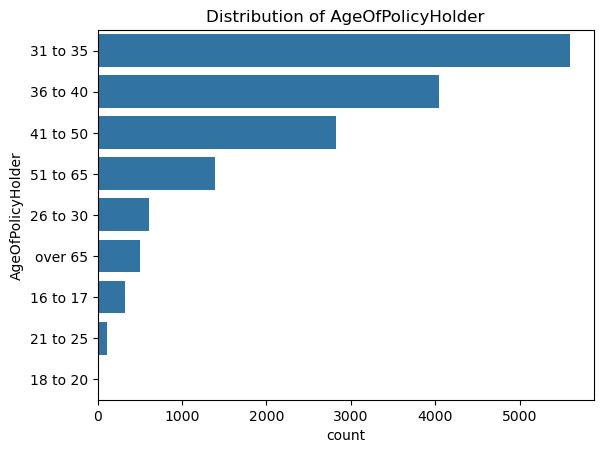

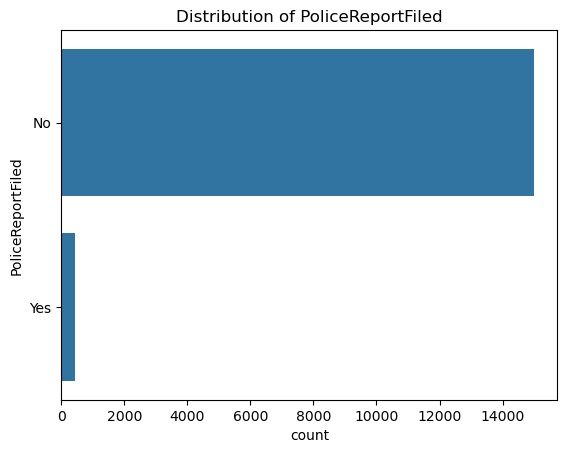

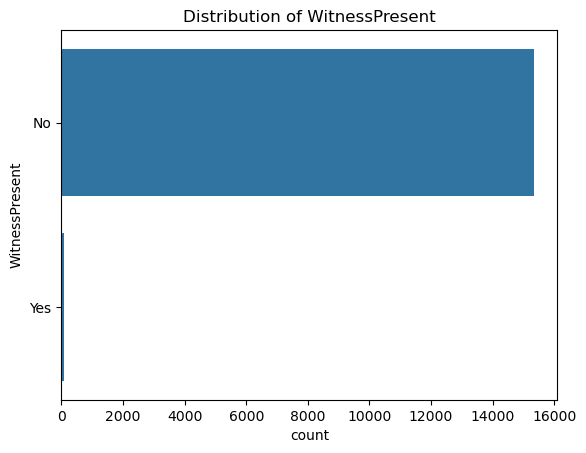

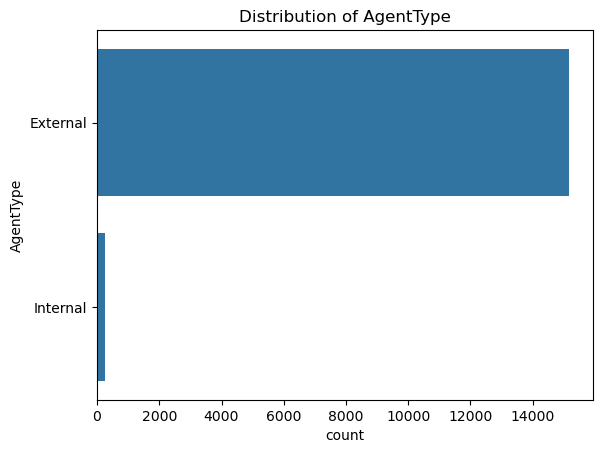

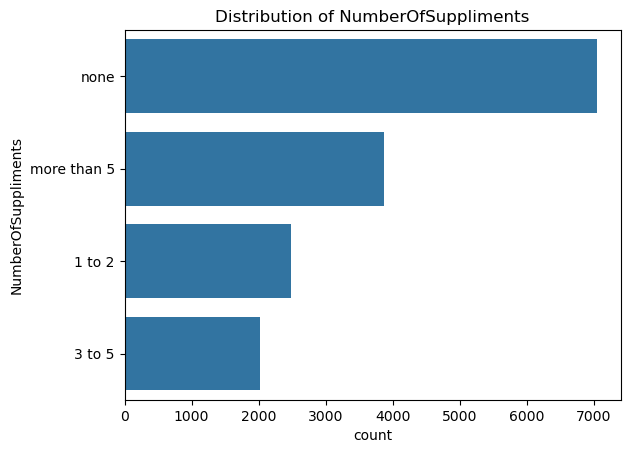

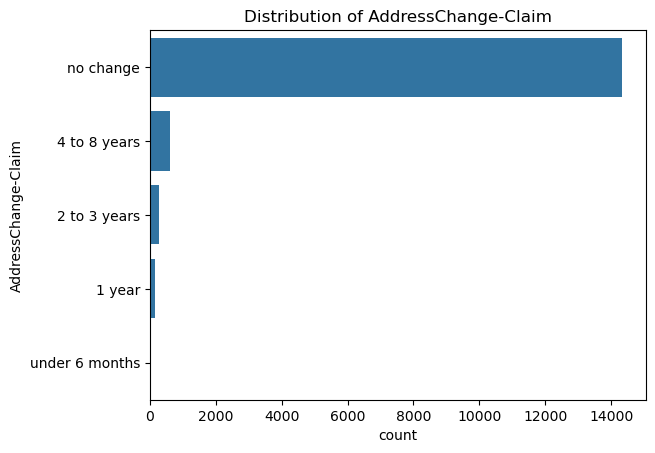

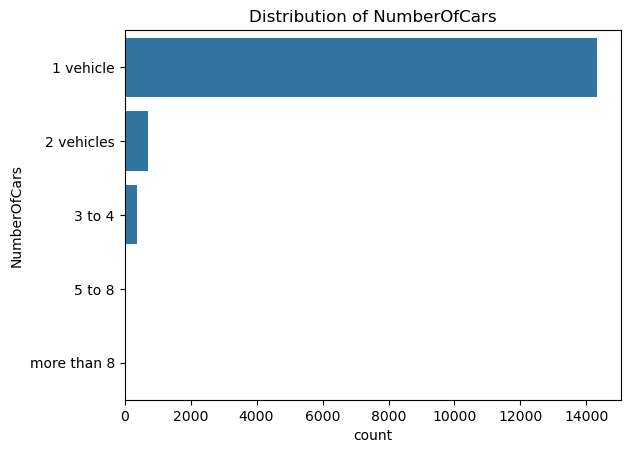

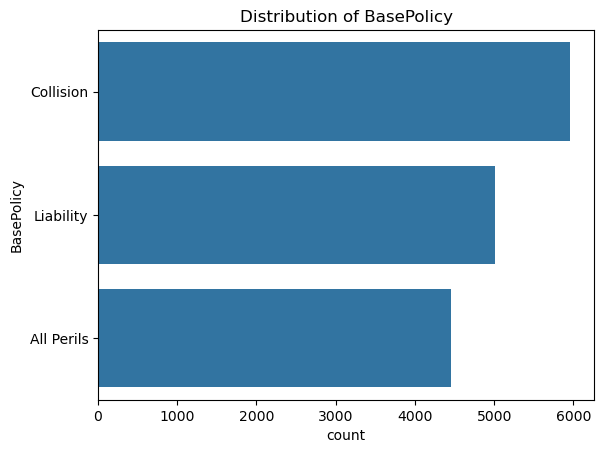

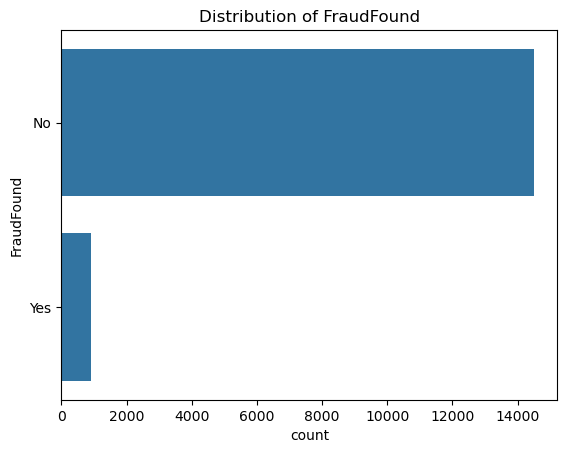

In [26]:
for col in top_catcols:
    sns.countplot ( y = col , data = df , order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

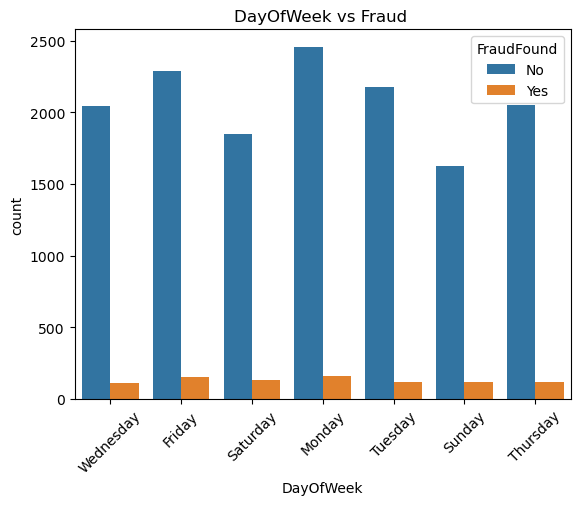

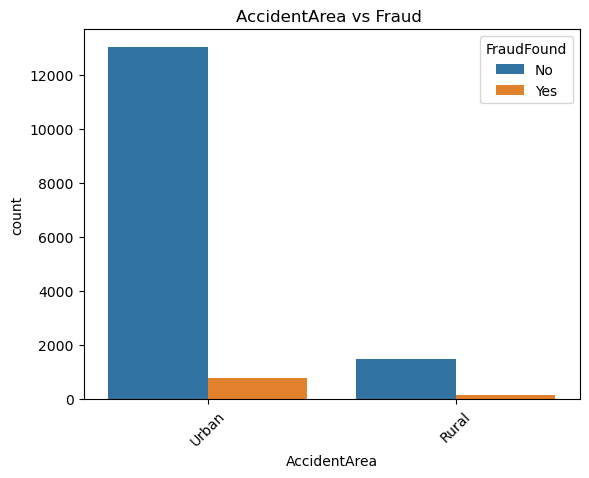

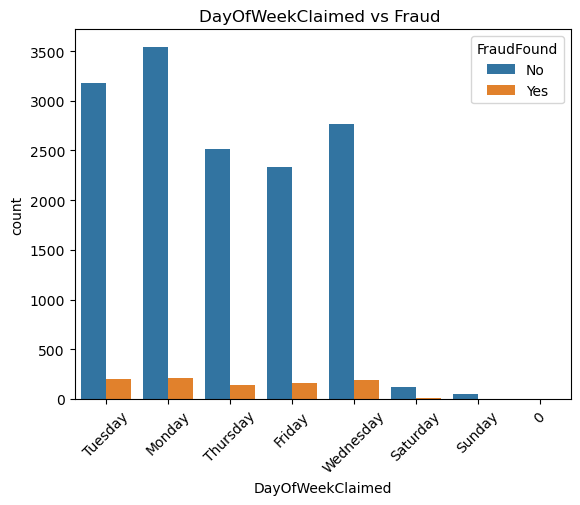

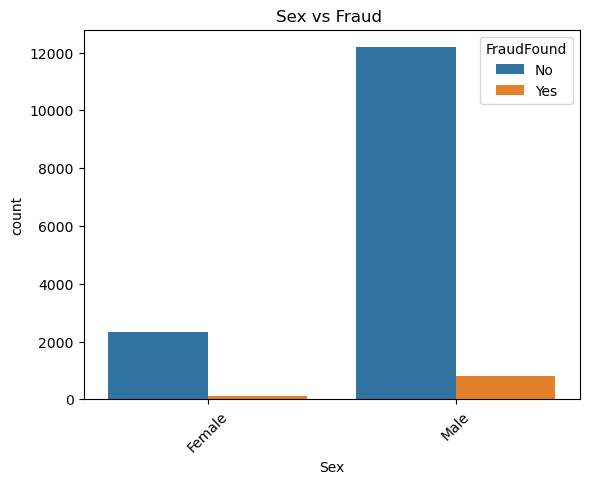

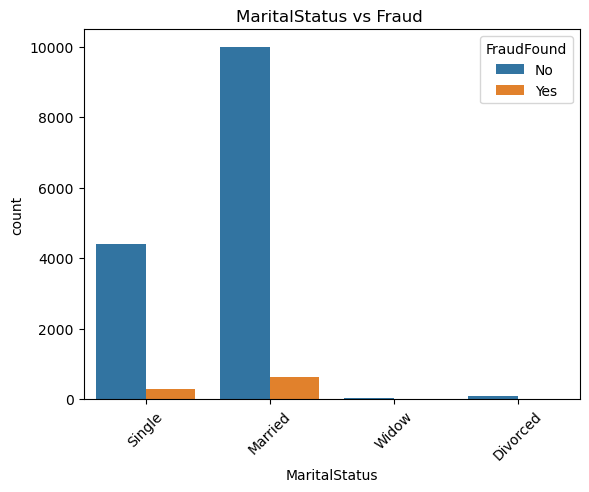

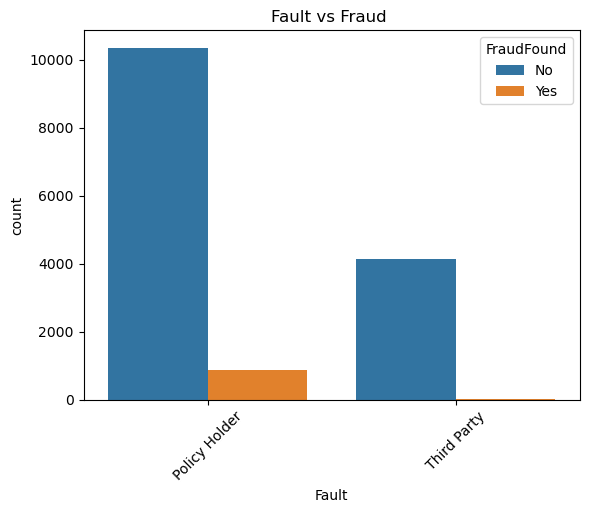

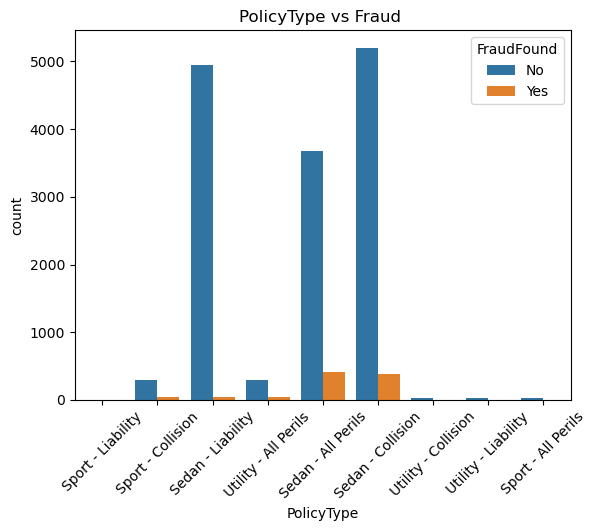

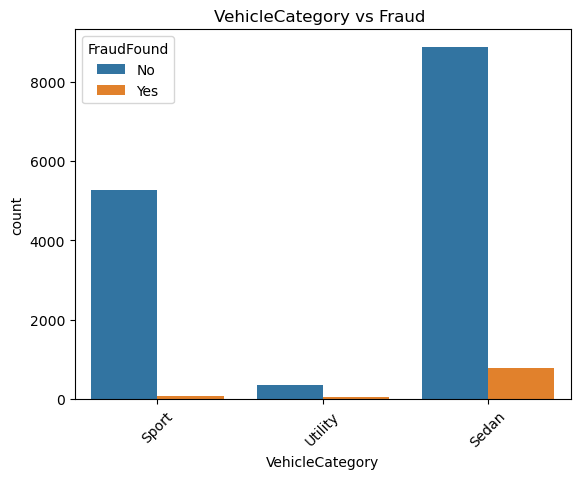

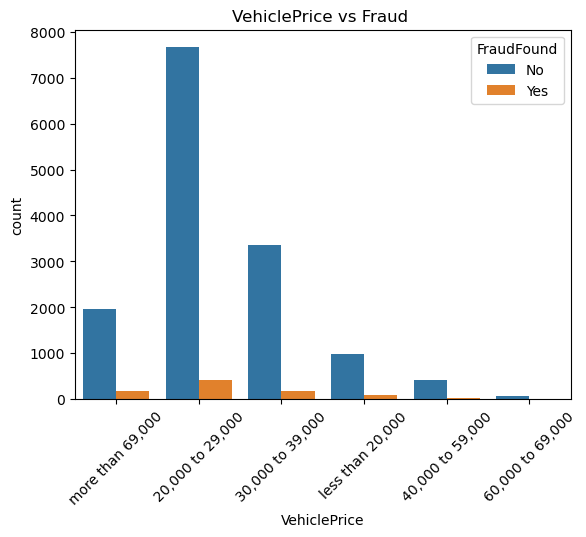

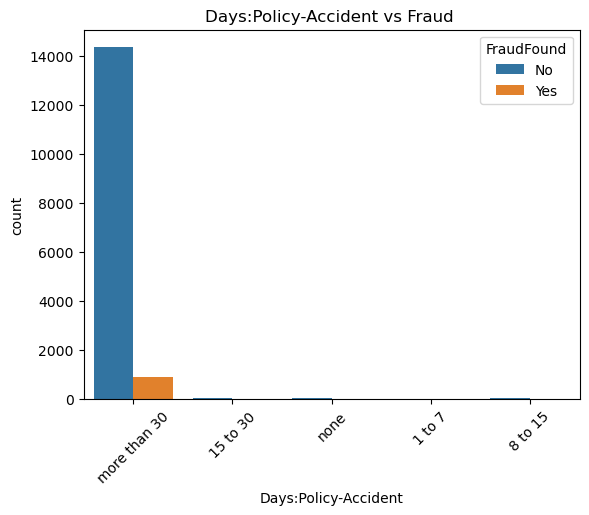

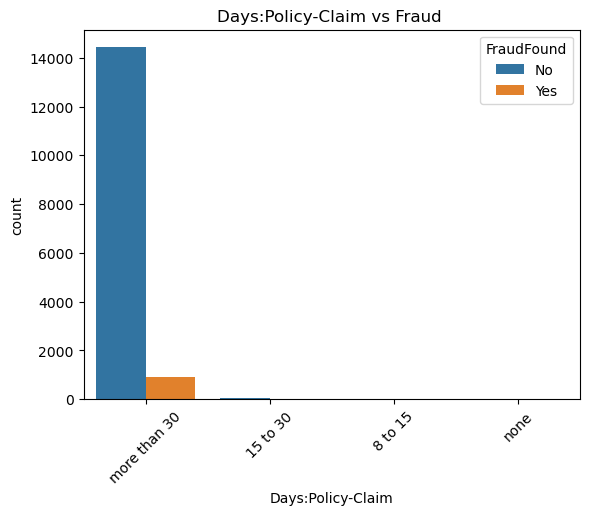

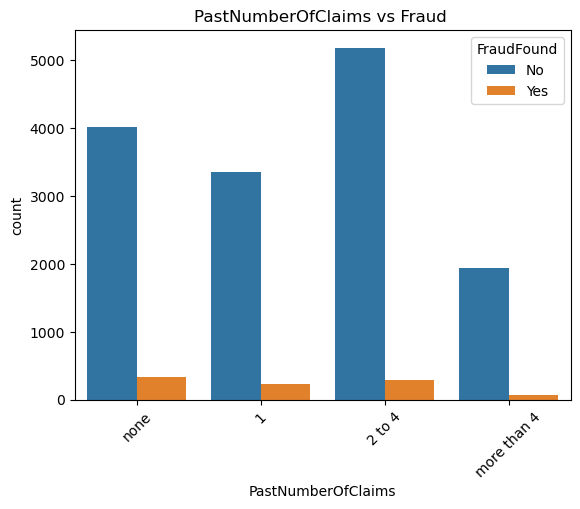

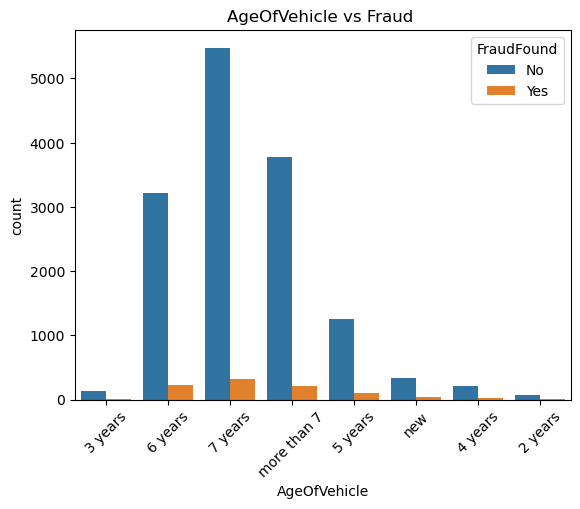

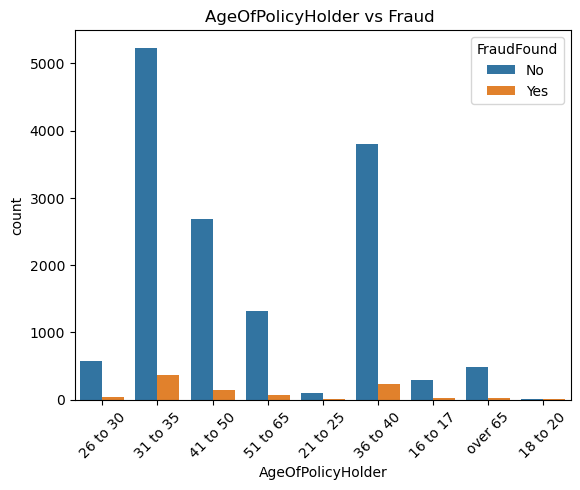

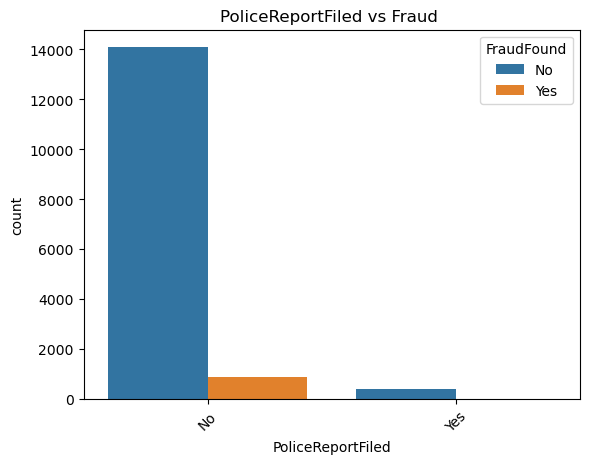

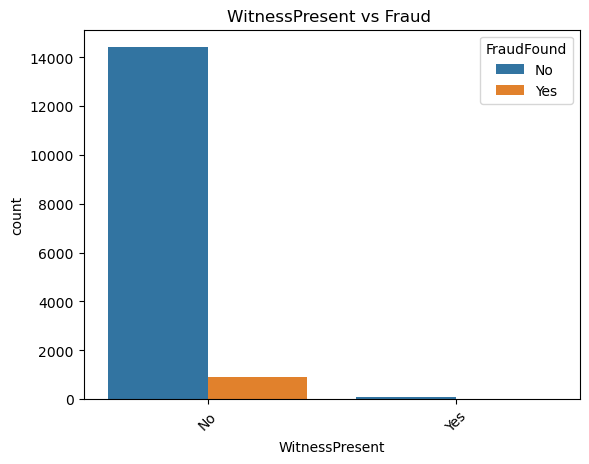

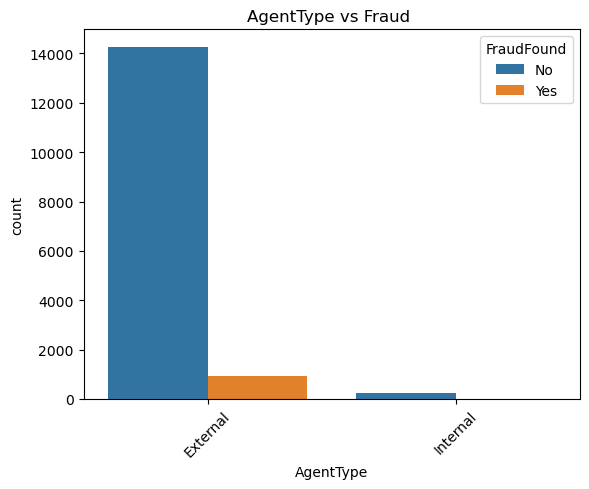

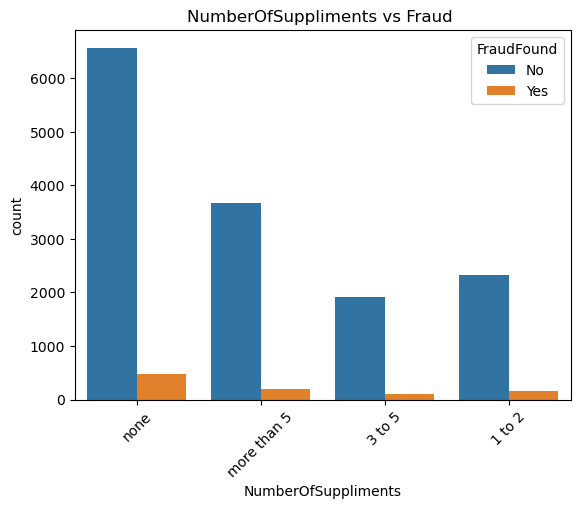

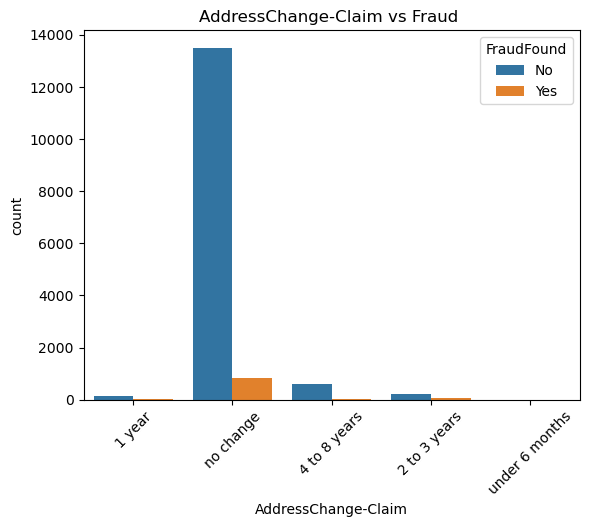

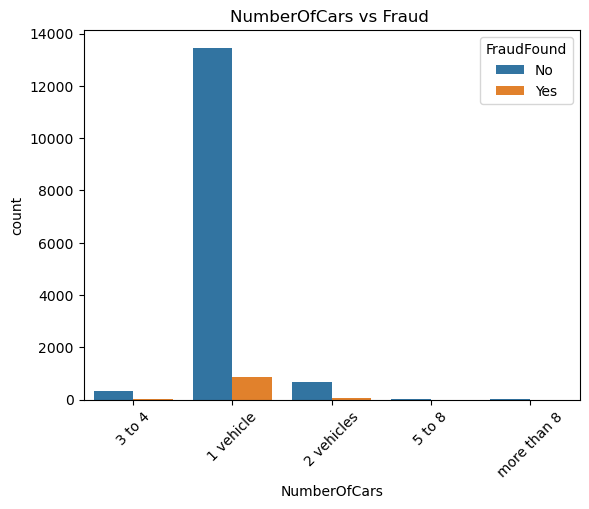

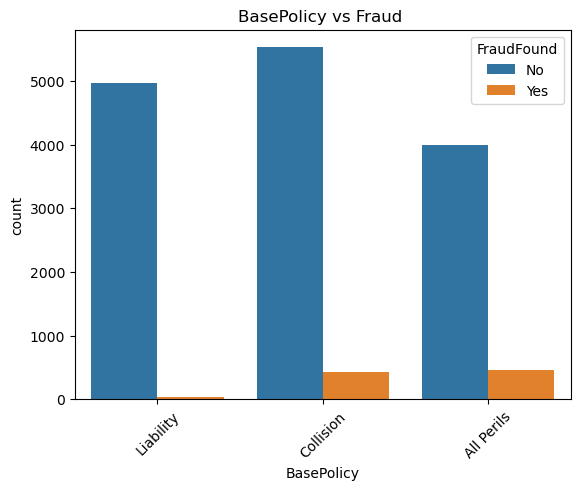

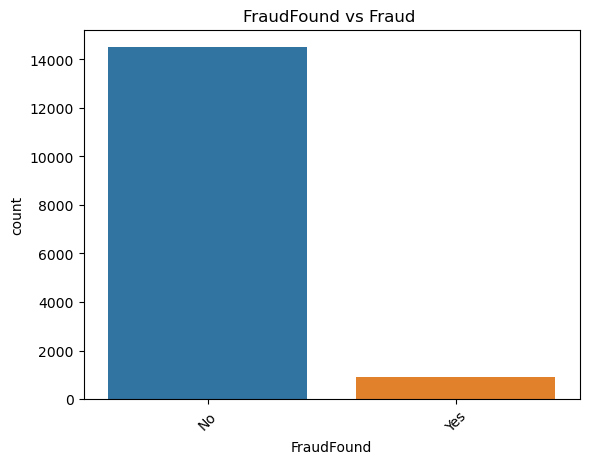

In [30]:
# Relatiosn between feature adn fraud 

for col in top_catcols :
    sns.countplot( x = col , hue = 'FraudFound' , data = df)
    plt.title(f'{col} vs Fraud ')
    plt.xticks(rotation = 45)
    plt.show()

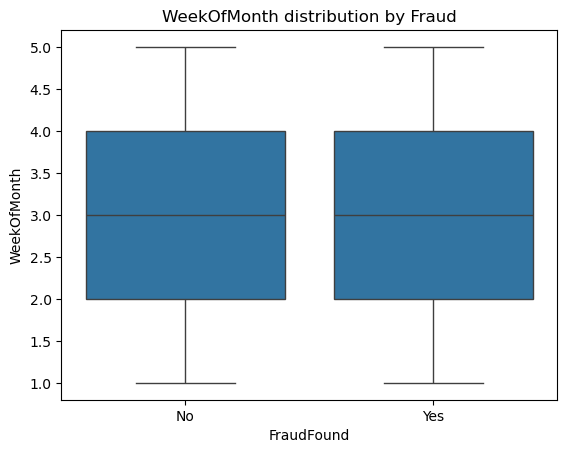

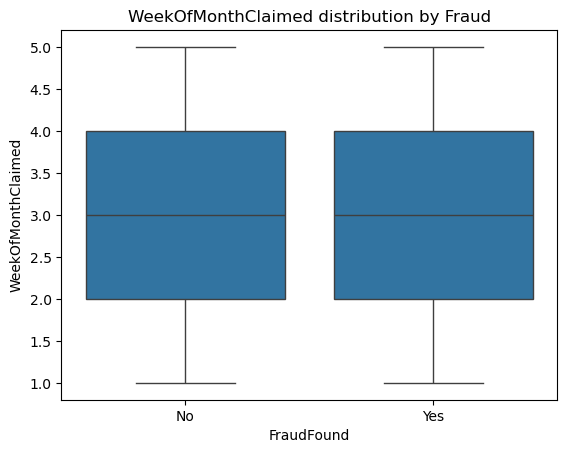

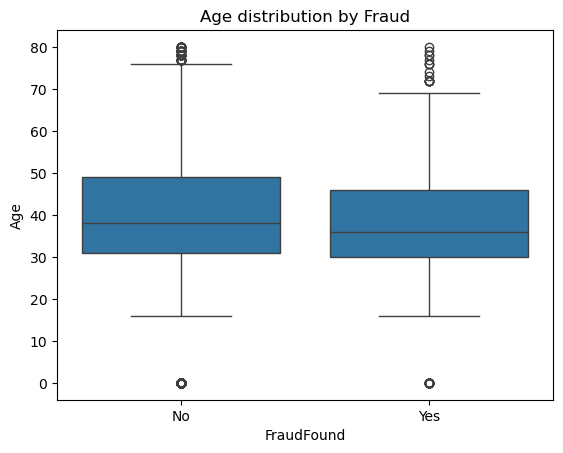

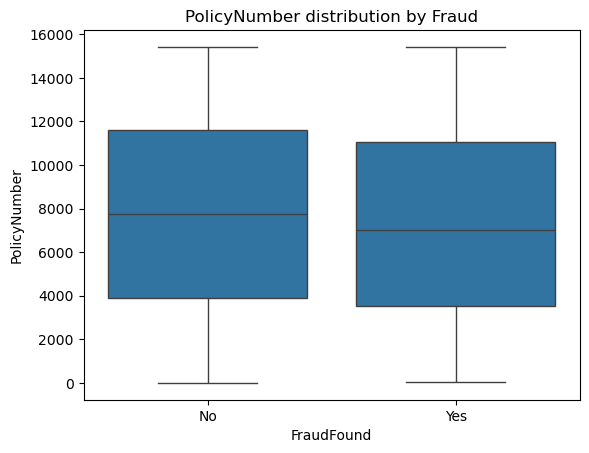

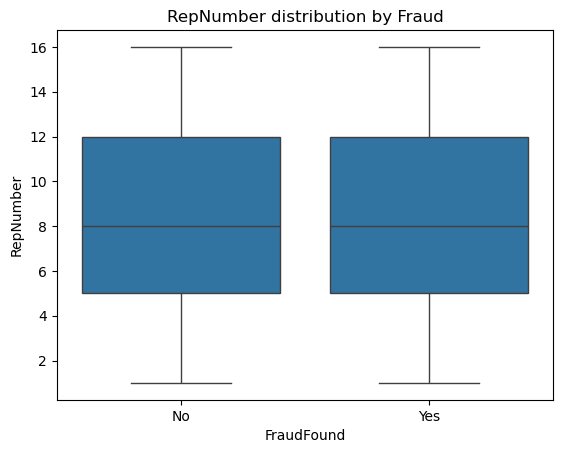

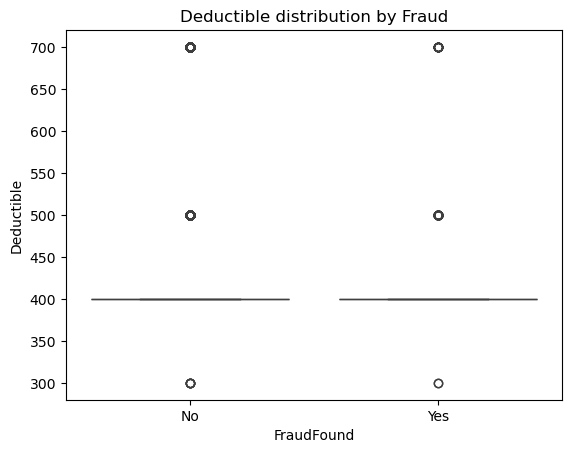

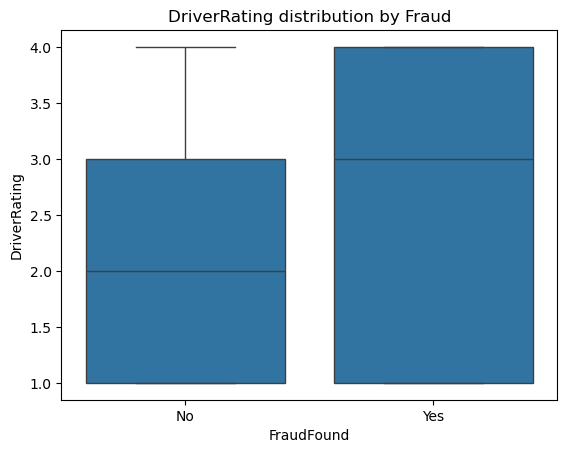

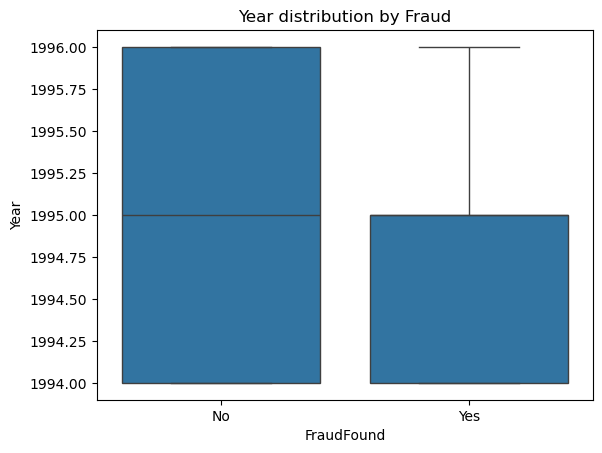

In [32]:
for col in num_cols:
    sns.boxplot(x = 'FraudFound' , y = col , data = df)
    plt.title(f'{col} distribution by Fraud')
    plt.show()

In [39]:
df_nums = df.select_dtypes(include = np.number)

Text(0.5, 1.0, 'Correlation Matrix')

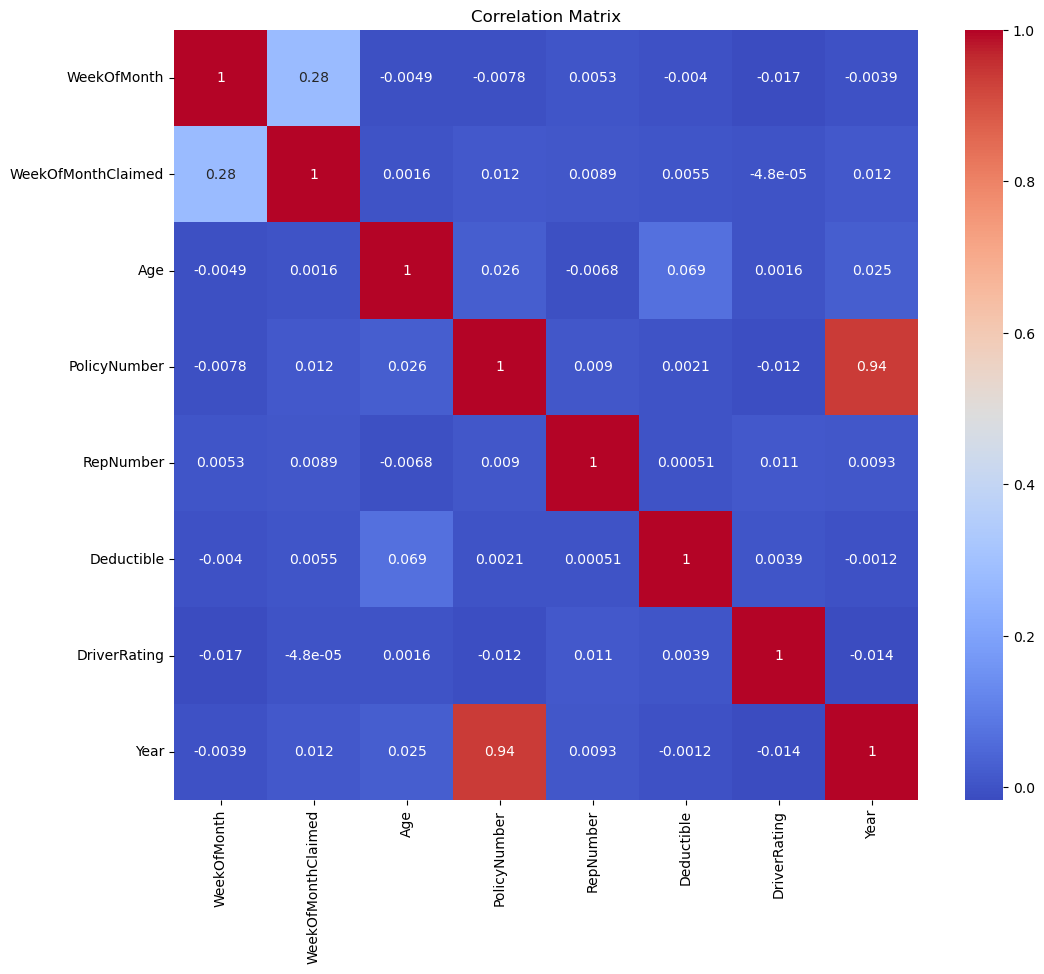

In [41]:
# Correlation check 
corr = df_nums.corr()
plt.figure(figsize = (12 , 10))
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.title("Correlation Matrix")

In [75]:
df = df.drop(columns=['PolicyNumber'] , inplace = True)


In [43]:
fraud_pct = df['FraudFound'].value_counts(normalize=True) * 100
print(fraud_pct)
# Better to evaluate using F1 , precision-recall ,, use stratified train-test split 
#smote /undersampling 

FraudFound
No     94.014267
Yes     5.985733
Name: proportion, dtype: float64


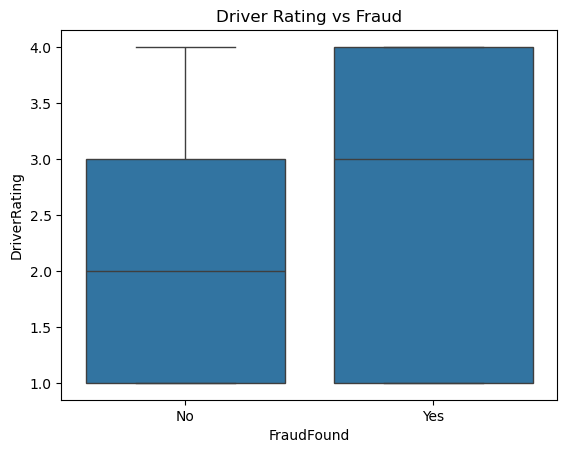

In [50]:
sns.boxplot(x='FraudFound', y='DriverRating', data=df)
plt.title("Driver Rating vs Fraud")
plt.show()

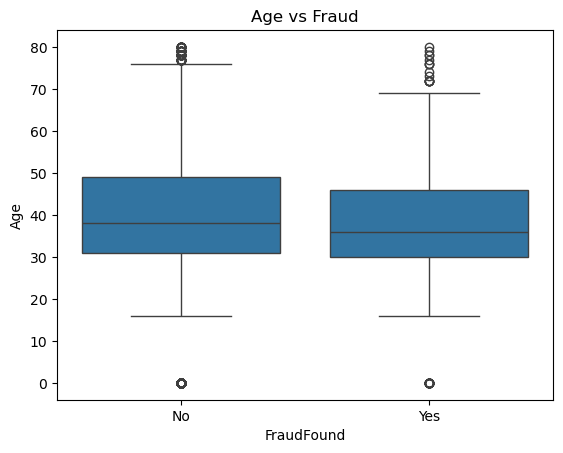

In [52]:
sns.boxplot(x='FraudFound', y='Age', data=df)
plt.title("Age vs Fraud")
plt.show()


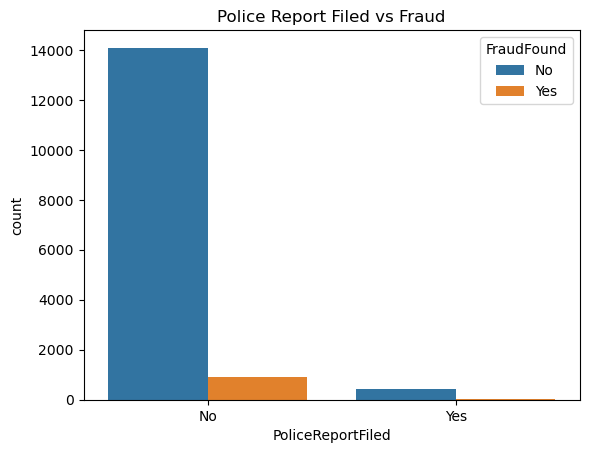

In [54]:
sns.countplot(x='PoliceReportFiled', hue='FraudFound', data=df)
plt.title("Police Report Filed vs Fraud")
plt.show()


In [ ]:
# df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
# df['incident_date'] = pd.to_datetime(df['incident_date'])
# df['days_since_policy_bind'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [45]:
vehicle_price_map = {
    'less than 20,000': 0,
    '20,000 to 29,000': 1,
    '30,000 to 39,000': 2,
    '40,000 to 59,000': 3,
    '60,000 to 69,000': 4,
    'more than 69,000': 5
}

days_policy_accident_map = {
    'none' : 0,
    '1 to 7': 4,
    '8 to 15': 11.5,
    '15 to 30': 22.5,
    'more than 30': 35
}

days_policy_claim_map = {
    'none': 4,
    '8 to 15': 11.5,
    '15 to 30': 22.5,
    'more than 30': 35
}

past_claims_map = {
    'none':0,
    '1': 1,
    '2 to 4': 3,
    'more than 4': 5
}

age_vehicle_map = {
    'new': 0,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}

age_policyholder_map = {
    '16 to 17': 16.5,
    '18 to 20': 19,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 50': 45,
    '51 to 65': 58,
    'over 65': 70
}

suppliments_map = {
    'none' : 0,
    '1 to 2': 1.5,
    '3 to 5': 4,
    'more than 5': 6
}

address_change_map = {
    'under 6 months': 0.5,
    '1 year': 1,
    '2 to 3 years': 2.5,
    '4 to 8 years': 6,
    'no change': 0
}

number_of_cars_map = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 3.5,
    '5 to 8': 6.5,
    'more than 8': 9
}

#ordinal maps
df['VehiclePrice'] = df['VehiclePrice'].map(vehicle_price_map)
df['Days:Policy-Accident'] = df['Days:Policy-Accident'].map(days_policy_accident_map)
df['Days:Policy-Claim'] = df['Days:Policy-Claim'].map(days_policy_claim_map)
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(past_claims_map)
df['AgeOfVehicle'] = df['AgeOfVehicle'].map(age_vehicle_map)
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(age_policyholder_map)
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(suppliments_map)
df['AddressChange-Claim'] = df['AddressChange-Claim'].map(address_change_map)
df['NumberOfCars'] = df['NumberOfCars'].map(number_of_cars_map)

# DRiver rating done 

In [47]:
#Binary encodings
binary_map = {'No': 0, 'Yes': 1, 'External': 0, 'Internal': 1, 'Third Party': 0, 'Policy Holder': 1, 'Male': 1, 'Female': 0 , 'Urban' :0 , 'Rural' : 1}
binary_columns = ['PoliceReportFiled', 'WitnessPresent', 'AgentType', 'Fault', 'Sex', 'FraudFound' ,'AccidentArea' ]

for col in binary_columns:
    df[col] = df[col].map(binary_map)

In [49]:
#label encoding for months and weekdays
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

weekday_map = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
    'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

df['Month'] = df['Month'].map(month_map)
df['MonthClaimed'] = df['MonthClaimed'].map(month_map)
df['DayOfWeek'] = df['DayOfWeek'].map(weekday_map)
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map(weekday_map)

In [51]:
# One-hot encoding for nominal categories
onehot_cols = ['MaritalStatus', 'PolicyType', 'VehicleCategory', 'BasePolicy', 'Make']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

print("Encoding complete. Dataset shape:", df.shape)

✅ Encoding complete. Dataset shape: (15420, 61)


In [53]:
df.head()

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,...,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW
0,12,5,3,0,2,1,1,0,21,1,...,False,False,False,False,False,False,False,False,False,False
1,1,3,3,0,1,1,4,1,34,1,...,False,False,False,False,False,False,False,False,False,False
2,10,5,5,0,4,11,2,1,47,1,...,False,False,False,False,False,False,False,False,False,False
3,6,2,6,1,5,7,1,1,65,0,...,False,False,False,False,False,False,False,False,True,False
4,1,5,1,0,2,2,2,0,27,0,...,False,False,False,False,False,False,False,False,False,False


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            15420 non-null  int64  
 1   WeekOfMonth                      15420 non-null  int64  
 2   DayOfWeek                        15420 non-null  int64  
 3   AccidentArea                     15420 non-null  object 
 4   DayOfWeekClaimed                 15420 non-null  int64  
 5   MonthClaimed                     15420 non-null  int64  
 6   WeekOfMonthClaimed               15420 non-null  int64  
 7   Sex                              15420 non-null  int64  
 8   Age                              15420 non-null  int64  
 9   Fault                            15420 non-null  int64  
 10  VehiclePrice                     15420 non-null  int64  
 11  PolicyNumber                     15420 non-null  int64  
 12  RepNumber         

In [ ]:
# For tree-based models, it’s okay to keep them as integers, since trees don't care about feature scaling or linearity.

In [ ]:
df_tree = df.copy()
df_tree.to_csv("insurance_clean_tree.csv", index=False)


In [65]:
# copy for logistic regression
df_lr = df.copy()


In [67]:
scaler = StandardScaler()
df_lr['Age'] = scaler.fit_transform(df_lr[['Age']])

# One-hot encoding for all remaining categorical/ordinal features
ohe_cols = [
    'DayOfWeek', 'DayOfWeekClaimed',
    'Month', 'MonthClaimed', 'WeekOfMonth', 'WeekOfMonthClaimed',
    'DriverRating', 'RepNumber', 'Deductible', 'Year' , 'VehiclePrice' ,'Days:Policy-Accident' , 'Days:Policy-Claim','PastNumberOfClaims','AgeOfVehicle',
     'AgeOfPolicyHolder','NumberOfSuppliments','AddressChange-Claim','NumberOfCars'
]

df_lr = pd.get_dummies(df_lr, columns=ohe_cols, drop_first=True)


In [69]:

# For Logistic Regression
df_lr.to_csv("insurance_clean_lr.csv", index=False)



In [ ]:
#EDA , Preprocessing done 